Python及び使用しているライブラリのバージョンの確認

In [1]:
import platform
print("python " + platform.python_version())
import pkg_resources
pkglist = ['numpy', 'scikit-learn', 'matplotlib', 'seaborn', 'pandas']
for dist in pkg_resources.working_set:
    if dist.project_name in pkglist:
        print(dist.project_name, dist.version)

python 3.6.1
matplotlib 2.0.2
numpy 1.12.1
pandas 0.20.1
scikit-learn 0.18.1
seaborn 0.7.1


必要なライブラリのインポート

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [3]:
data = pd.read_csv("doralysis.csv")
data.head()

,巻数,のび太,ドラえもん,行為,使用道具,Unnamed: 5,Unnamed: 6
0,10,1,NaN,盗撮,透視カメラ,NaN,NaN
1,12,1,NaN,お風呂侵入,ドンブラ粉,NaN,NaN
2,12,1,1.0,お風呂侵入,つりぼり,NaN,NaN
3,16,1,NaN,露出行為,しゃべる服,NaN,NaN
4,18,1,NaN,お風呂覗き見,スパイ衛星,NaN,NaN


matplotlibのスタイルの適用

In [4]:
plt.style.use('ggplot')

日本語対応　フォント一覧を表示

In [5]:
import matplotlib.font_manager as fm
fm.findSystemFonts()

['/System/Library/Fonts/SFCompactRounded-Medium.otf',
 '/Library/Fonts/STIXVar.otf',
 '/Library/Fonts/Tahoma.ttf',
 '/Library/Fonts/Trebuchet MS Bold Italic.ttf',
 '/Library/Fonts/STIXSizFourSymReg.otf',
 '/System/Library/Assets/com_apple_MobileAsset_Font3/456f218aaaff310805fa4003038e593c9db93d8b.asset/AssetData/YuppyTC-Regular.otf',
 '/System/Library/Fonts/LastResort.ttf',
 '/Library/Fonts/Arial Bold.ttf',
 '/System/Library/Fonts/SFNSTextCondensed-Bold.otf',
 '/Library/Fonts/Arial Narrow.ttf',
 '/Library/Fonts/Luminari.ttf',
 '/Library/Fonts/Chalkduster.ttf',
 '/System/Library/Fonts/SFNSDisplayCondensed-Medium.otf',
 '/System/Library/Assets/com_apple_MobileAsset_Font3/fdd4d0ac4ef5f1cfff55b2d5fe376ff2032ddea5.asset/AssetData/儷宋 Pro.ttf',
 '/Library/Fonts/Krungthep.ttf',
 '/System/Library/Fonts/Apple Braille Pinpoint 6 Dot.ttf',
 '/System/Library/Fonts/Apple Braille Outline 6 Dot.ttf',
 '/System/Library/Fonts/SFNSTextCondensed-Heavy.otf',
 '/System/Library/Fonts/SFNSDisplayCondensed-Ult

日本語フォントを選択

In [6]:
plt.rcParams['font.family'] = 'AppleGothic'

のび太とドラえもんの変態行為の割合比較

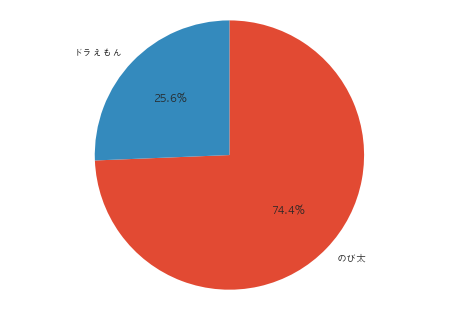

In [7]:
nobi = data["のび太"].sum()
dora = data["ドラえもん"].sum()
x = np.array([nobi, dora])
label = ["のび太", "ドラえもん"]
plt.pie(x, labels=label, counterclock=False, startangle=90, autopct="%1.1f%%")
plt.axis('equal')
plt.show()

変態行為の割合

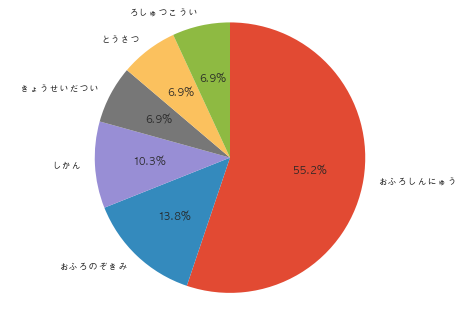

In [8]:
bath_in = data["行為"].str.contains("お風呂侵入", na=False).sum()
bath_see = data["行為"].str.contains("お風呂覗き見", na=False).sum()
shikan = data["行為"].str.contains("視姦", na=False).sum()
nuginugi = data["行為"].str.contains("衣服を脱がせる", na=False).sum()
tousatsu = data["行為"].str.contains("盗撮", na=False).sum()
roshutsu = data["行為"].str.contains("露出行為", na=False).sum()
x = np.array([bath_in, bath_see, shikan, nuginugi, tousatsu, roshutsu])
label = ["おふろしんにゅう", "おふろのぞきみ", "しかん", "きょうせいだつい", "とうさつ", "ろしゅつこうい"]
plt.pie(x, labels=label, counterclock=False, startangle=90, autopct="%1.1f%%")
plt.axis('equal')
plt.show()

使用した秘密道具

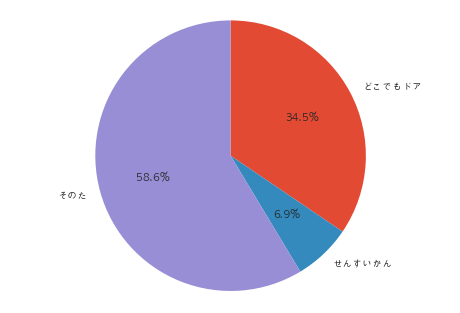

In [9]:
dogu_all = data["使用道具"].str.contains("", na=False).sum()
dokodemodoa = data["使用道具"].str.contains("どこでもドア", na=False).sum()
sensuikan = data["使用道具"].str.contains("潜水艦", na=False).sum()
etc = dogu_all - dokodemodoa - sensuikan
x = np.array([dokodemodoa, sensuikan, etc])
label = ["どこでもドア", "せんすいかん", "そのた"]
plt.pie(x, labels=label, counterclock=False, startangle=90, autopct="%1.1f%%")
plt.axis('equal')
plt.show()